In [13]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import numpy as np

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape

(10000, 28, 28)

In [15]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [16]:
num_classes = 10

In [17]:
print(y_train[0])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                      

In [22]:
model.compile(loss= keras.losses.categorical_crossentropy, optimizer= keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size= 40, epochs= 10, validation_data=(X_test,y_test), verbose= 1)

score = model.evaluate(X_test, y_test)
print(score)

Epoch 1/10
1500/1500 [==============================] - 32s 21ms/step - loss: 12.7915 - accuracy: 0.1168 - val_loss: 2.5647 - val_accuracy: 0.2307
Epoch 2/10
1500/1500 [==============================] - 52s 35ms/step - loss: 3.8338 - accuracy: 0.1662 - val_loss: 2.0454 - val_accuracy: 0.2542
Epoch 3/10
1500/1500 [==============================] - 32s 21ms/step - loss: 2.5829 - accuracy: 0.1816 - val_loss: 2.0646 - val_accuracy: 0.2586
Epoch 4/10
1500/1500 [==============================] - 31s 20ms/step - loss: 2.3022 - accuracy: 0.1982 - val_loss: 2.0171 - val_accuracy: 0.2926
Epoch 5/10
1500/1500 [==============================] - 30s 20ms/step - loss: 2.1765 - accuracy: 0.2272 - val_loss: 1.9161 - val_accuracy: 0.3547
Epoch 6/10
1500/1500 [==============================] - 30s 20ms/step - loss: 2.0829 - accuracy: 0.2635 - val_loss: 1.7715 - val_accuracy: 0.4366
Epoch 7/10
1500/1500 [==============================] - 32s 21ms/step - loss: 2.0093 - accuracy: 0.2918 - val_loss: 1.6515 

313/313 [==============================] - 1s 4ms/step - loss: 1.3780 - accuracy: 0.5802
Test Accuracy: 58.02%


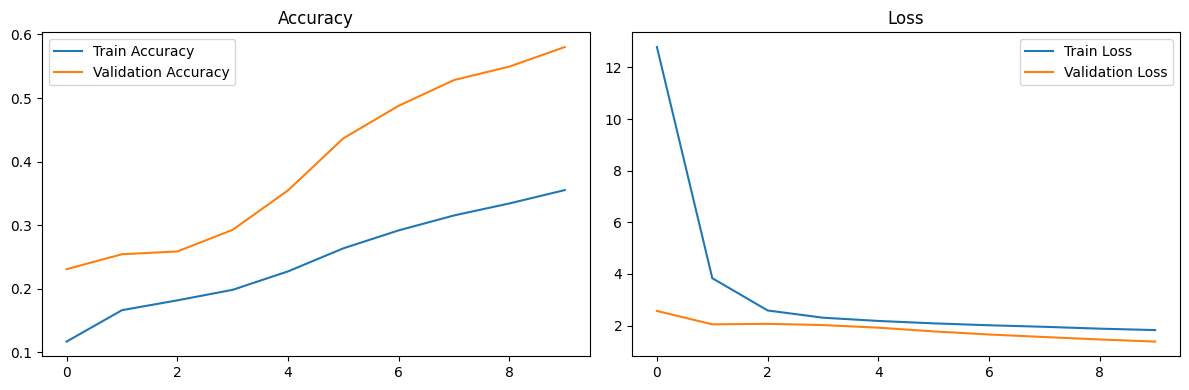

In [23]:
import matplotlib.pyplot as plt
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plotting the training accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()